In [96]:
import numpy as np
import pandas as pd
import sklearn.tree
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, confusion_matrix, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses, metrics, optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [24]:
dataX = [[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
         [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
         [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
         [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
         [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
         [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
         [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
         [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
         [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
         [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
         [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
         [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
         [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
         [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
         [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
         [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
         [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
         [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
         [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]

dataY = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
df = pd.DataFrame(dataX)
df['y'] = dataY
df

,0,1,2,3,4,5,6,7,8,9,10,11,y
0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,1,1,0,0,0,0,1,1,1,0,1,0,1
2,1,1,0,0,1,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,1,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1
5,0,1,0,0,1,0,1,0,0,0,0,1,1
6,1,1,0,0,1,0,0,0,0,0,1,0,1
7,1,1,0,0,0,0,0,1,0,0,0,1,1
8,0,0,0,0,1,0,0,1,0,0,0,0,1
9,0,1,1,0,1,0,1,1,0,1,0,0,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], shuffle=True, test_size=0.2,
                                                    random_state=0)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [65]:
model = Sequential([
    Input((1, X_train.shape[2])),
    Dense(units=10, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy', AUC])
model.fit(X_train, y_train,
          epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step - accuracy: 0.4286 - auc_12: 0.5391 - loss: 0.9933
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4286 - auc_12: 0.5104 - loss: 0.8911
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4286 - auc_12: 0.5234 - loss: 0.8045
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4286 - auc_12: 0.5443 - loss: 0.7304
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4286 - auc_12: 0.5521 - loss: 0.6670
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4286 - auc_12: 0.5286 - loss: 0.6127
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4286 - auc_12: 0.5391 - loss: 0.5657
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4286 - auc_12: 0.5312 - loss: 0.5250
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4643 - auc_12: 0.5182 - loss: 0.4902
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4643 - auc_12: 0.5365 - loss: 0.459

In [67]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3750 - auc_12: 0.8000 - loss: 0.4196


[0.419625461101532, 0.375, 0.7999999523162842]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], shuffle=True, test_size=0.4,
                                                    random_state=0)

estimator = DecisionTreeClassifier()
grid = GridSearchCV(estimator,
                    param_grid={'splitter': ['best', 'random'],
                                'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_depth': range(4, 10),
                                'min_samples_leaf': range(1, 5),
                                'min_samples_split': range(1, 5)},
                    n_jobs=-1)
grid.fit(X_train, y_train)
best_tree = grid.best_estimator_
grid.best_params_

D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

precision_score(y_test, y_preds)=0.7142857142857143
recall_score(y_test, y_preds)=0.8333333333333334
[[7 2]
 [1 5]]
[0.2        0.2        1.         1.         0.2        1.
 1.         1.         1.         0.2        0.2        0.2
 0.2        0.66666667 0.2       ]


<Figure size 640x480 with 0 Axes>

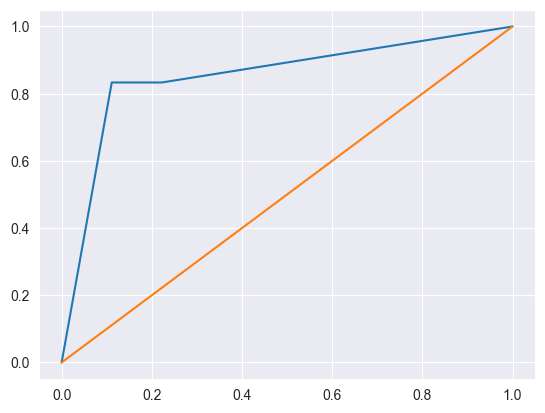

<Figure size 640x480 with 0 Axes>

In [106]:
y_probs = best_tree.predict_proba(X_test)[:,1]
y_preds = best_tree.predict(X_test)
print(f'{precision_score(y_test, y_preds)=}')
print(f'{recall_score(y_test, y_preds)=}')

conf_matrix = confusion_matrix(y_test, y_preds)
print(confusion_matrix(y_test, y_preds))
print(y_probs)

ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
fpr, tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(fpr, tpr)

plt.figure()